In [17]:
import sys
sys.path.append("..")

In [18]:
from datasets import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#SAT_df=get_SATScores()
SAT_df=pd.read_csv('https://data.cityofnewyork.us/resource/rt5r-ie69.csv')
SAT_df.head()

,critical_reading_mean,dbn,mathematics_mean,number_of_test_takers,school_name,writing_mean
0,391.0,01M292,425.0,31.0,Henry Street School for International Studies,385.0
1,394.0,01M448,419.0,60.0,University Neighborhood High School,387.0
2,418.0,01M450,431.0,69.0,East Side Community High School,402.0
3,385.0,01M458,370.0,26.0,SATELLITE ACADEMY FORSYTH ST,378.0
4,NaN,01M509,NaN,NaN,CMSP HIGH SCHOOL,NaN


In [19]:
SAT_df.loc[SAT_df.dbn=='25Q540']



,critical_reading_mean,dbn,mathematics_mean,number_of_test_takers,school_name,writing_mean
305,400.0,25Q540,395.0,22.0,QUEENS ACADEMY,391.0


In [20]:
## removing this index specifcally because it was in between 

SAT_df=SAT_df.drop([305],axis=0)

In [21]:
SAT_df = SAT_df.dropna()


In [22]:
SAT_df=SAT_df.reset_index()


In [23]:
SAT_df.shape

(385, 7)

In [24]:
SAT_df.head()

,index,critical_reading_mean,dbn,mathematics_mean,number_of_test_takers,school_name,writing_mean
0,0,391.0,01M292,425.0,31.0,Henry Street School for International Studies,385.0
1,1,394.0,01M448,419.0,60.0,University Neighborhood High School,387.0
2,2,418.0,01M450,431.0,69.0,East Side Community High School,402.0
3,3,385.0,01M458,370.0,26.0,SATELLITE ACADEMY FORSYTH ST,378.0
4,5,314.0,01M515,532.0,154.0,Lower East Side Preparatory High School,314.0


In [25]:
def getSATbyDistrict():
    '''
    Ouput list are in this order: 
    District,
    Total Exam Takers, 
    Reading Average, 
    Math Average,
    Writing Average, 
    Total SAT score
    '''
    district= 1
    total=0
    r=0
    m=0
    w=0
    count=0
    SAT_by_district=[]
    for i in range(0,len(SAT_df.index)):
        # first two digits of dbn are districts
        district_data=int(SAT_df.loc[i].dbn[:2])
        total_sat_takers=int(SAT_df.loc[i].number_of_test_takers)
        reading=int(SAT_df.loc[i].critical_reading_mean)
        math=int(SAT_df.loc[i].mathematics_mean)
        writing=int(SAT_df.loc[i].writing_mean)
        
        if(district_data==district):
            total+=total_sat_takers
            r+=reading
            m+=math
            w+=writing
            count+=1
        
        # this is the point where next district starts.    
        else:
            r_avg=r/count
            m_avg=m/count
            w_avg=w/count

            SAT_by_district.append([district , total, r_avg, m_avg, w_avg, r_avg + m_avg + w_avg])

            district+=1
            count=1 
            total=total_sat_takers
            r=reading
            m=math
            w=writing
        if(district_data==75):
            break
    return SAT_by_district

In [26]:
SATData=getSATbyDistrict()


In [27]:
indexes=list(range(32))
SAT_sorted_scores=[SATData[x][5] for x in indexes]

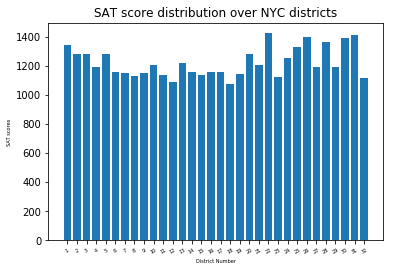

In [33]:
x = [x+1 for x in indexes]

plt.bar(x, SAT_sorted_scores)
plt.xlabel('District Number', fontsize=5)
plt.ylabel('SAT scores', fontsize=5)
plt.xticks(x, x, fontsize=5, rotation=30)
plt.title('SAT score distribution over NYC districts')
plt.show()




In [13]:
from operator import itemgetter


In [14]:
sorted_SATData=sorted(SATData, key=itemgetter(5))

In [15]:

print('District',sorted_SATData[0][0],'has the  worst average SAT scores of ',sorted_SATData[0][-1])
print('District',sorted_SATData[-1][0],'has the  best average SAT scores of ',sorted_SATData[-1][-1])

District 18 has the  worst average SAT scores of  1075.1999999999998
District 22 has the  best average SAT scores of  1424.0


In [29]:
get_SchoolsByDistrict(22)

['MIDWOOD HIGH SCHOOL',
 'JAMES MADISON HIGH SCHOOL',
 'SHEEPSHEAD BAY HIGH SCHOOL',
 'LEON M. GOLDSTEIN HIGH SCHOOL FOR THE SCIENCES',
 'BROOKLYN COLLEGE ACADEMY']

In [30]:
get_SchoolsByDistrict(18)

['IT TAKES A VILLAGE ACADEMY',
 'BROOKLYN GENERATION SCHOOL',
 'BROOKLYN THEATRE ARTS HIGH SCHOOL',
 'KURT HAHN EXPEDITIONARY LEARNING SCHOOL',
 'VICTORY COLLEGIATE HIGH SCHOOL',
 'BROOKLYN BRIDGE ACADEMY',
 'ARTS & MEDIA PREPARATORY ACADEMY',
 'HIGH SCHOOL FOR INNOVATION IN ADVERTISING AND MEDIA',
 'CULTURAL ACADEMY FOR THE ARTS AND SCIENCES',
 'HIGH SCHOOL FOR MEDICAL PROFESSIONS',
 'OLYMPUS ACADEMY',
 'ACADEMY FOR CONSERVATION AND THE ENVIRONMENT',
 'URBAN ACTION ACADEMY',
 'EAST BROOKLYN COMMUNITY HIGH SCHOOL']